In [20]:
# Notebook para probar la creacion del dataframe y las conversiones de tipos de datos
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

country = "Spain"
res = requests.get(f"http://127.0.0.1:8000/confirmed/{country}")
data = res.json()
raw =[list(data.keys()), list(data.values())]

In [30]:
# Conversion a datetime e int (para las fechas y los casos, respectivamente)
dates = [datetime.date(datetime.strptime(date_string, '%m/%d/%y')) for date_string in raw[0]]
cases = [int(n) for n in raw[1]]

In [31]:
df = pd.DataFrame([dates, cases]).T
df.columns = ["Date", "Cases"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    445 non-null    object
 1   Cases   445 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB


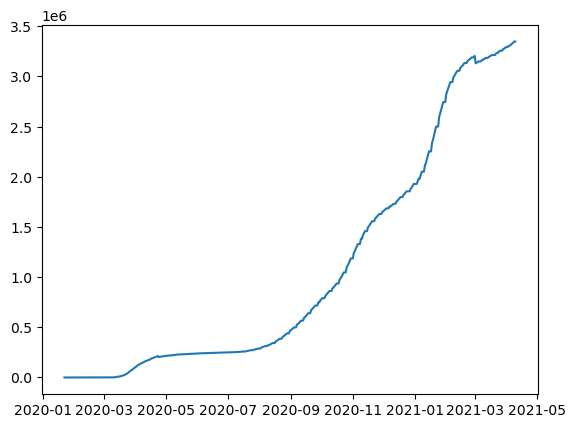

In [32]:
plt.plot(df['Date'], df['Cases'])

Text(0.5, 1.0, 'Total confirmed deaths in Spain')

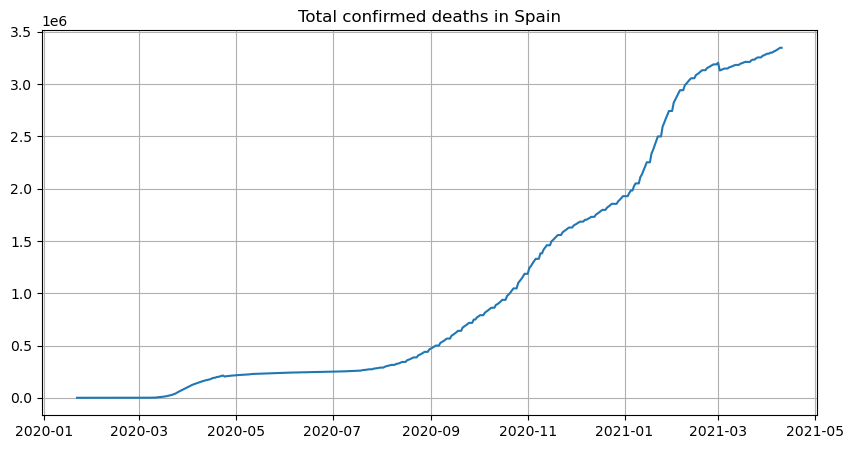

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot(dates, cases)
plt.grid('minor')
plt.title(f"Total confirmed deaths in {country}")

In [35]:
MIN_DATE = datetime.date(datetime(2021,1,22))
MAX_DATE = datetime.date(datetime(2021,4,1))

df.loc[(df['Date']>=MIN_DATE) & (df['Date']<=MAX_DATE)]

,Date,Cases
366,2021-01-22,2499560
367,2021-01-23,2499560
368,2021-01-24,2499560
369,2021-01-25,2593382
370,2021-01-26,2629817
...,...,...
431,2021-03-28,3255324
432,2021-03-29,3270825
433,2021-03-30,3275819
434,2021-03-31,3284353
